<a href="https://colab.research.google.com/github/adityab-28/WTurbine_FS_based_CM/blob/main/Copy_of_AB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls drive/MyDrive/T01(1).csv

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `ls drive/MyDrive/T01(1).csv'


In [ ]:
import pandas as pd
from sklearn.neighbors import NeighborhoodComponentsAnalysis as nca

In [ ]:
df=pd.read_csv('drive/MyDrive/T01(1).csv')

In [ ]:
df.columns

Index(['Turbine_ID', 'Timestamp', 'Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg',
       'Gen_RPM_Std', 'Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg',
       'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 'Hyd_Oil_Temp_Avg',
       'Gear_Oil_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Nac_Temp_Avg',
       'Rtr_RPM_Max', 'Rtr_RPM_Min', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Max',
       'Amb_WindSpeed_Min', 'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std',
       'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg', 'Amb_Temp_Avg',
       'Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_ActPwrGen1',
       'Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_TotActPwr',
       'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1',
       'Prod_LatestAvg_ReactPwrGen2', 'Prod_LatestAvg_TotReactPwr',
       'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg',
       'HVTrafo_Phase3_Temp_Avg', 'Grd_InverterPhase1_Temp_Avg',
       'Cont_Top_Temp_Avg', 'Cont_Hub_Temp_Avg', 'Cont_VCP_Temp_Avg',
       'Gen_SlipRing_Temp_Avg', 'Spin

In [ ]:
df.columns.shape

(83,)

In [ ]:
"""df.drop(columns=['Timestamp', 'Gen_RPM_Max', 'Gen_RPM_Min', 'Rtr_RPM_Max', 'Rtr_RPM_Min', 'Amb_WindSpeed_Max',
       'Amb_WindSpeed_Min', 'Amb_WindDir_Abs_Avg', 'Prod_LatestAvg_TotActPwr', 'Prod_LatestAvg_TotReactPwr', 'Blds_PitchAngle_Min',
       'Blds_PitchAngle_Max', 'Grd_Prod_Pwr_Max', 'Grd_Prod_Pwr_Min', 'Grd_Prod_ReactPwr_Max', 'Grd_Prod_ReactPwr_Min',
       'Grd_Prod_PsblePwr_Max', 'Grd_Prod_PsblePwr_Min', 'Grd_Prod_PsbleInd_Max',
       'Grd_Prod_PsbleInd_Min', 'Grd_Prod_PsbleCap_Max', 'Grd_Prod_PsbleCap_Min'], inplace=True)"""
df.drop(columns=['Turbine_ID', 'Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg',
       'Gen_RPM_Std', 'Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg',
       'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 'Hyd_Oil_Temp_Avg',
       'Rtr_RPM_Max', 'Rtr_RPM_Min', 'Amb_WindSpeed_Max',
       'Amb_WindSpeed_Min',
       'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg',
       'Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_ActPwrGen1',
       'Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_TotActPwr',
       'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1',
       'Prod_LatestAvg_ReactPwrGen2', 'Prod_LatestAvg_TotReactPwr',
       'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg',
       'HVTrafo_Phase3_Temp_Avg', 'Grd_InverterPhase1_Temp_Avg',
       'Cont_Top_Temp_Avg', 'Cont_Hub_Temp_Avg', 'Cont_VCP_Temp_Avg',
       'Gen_SlipRing_Temp_Avg', 'Spin_Temp_Avg', 'Blds_PitchAngle_Min',
       'Blds_PitchAngle_Max', 'Blds_PitchAngle_Avg', 'Blds_PitchAngle_Std',
       'Cont_VCP_ChokcoilTemp_Avg', 'Grd_RtrInvPhase1_Temp_Avg',
       'Grd_RtrInvPhase2_Temp_Avg', 'Grd_RtrInvPhase3_Temp_Avg',
       'Cont_VCP_WtrTemp_Avg', 'Grd_Prod_Pwr_Avg', 'Grd_Prod_CosPhi_Avg',
       'Grd_Prod_Freq_Avg', 'Grd_Prod_VoltPhse1_Avg', 'Grd_Prod_VoltPhse2_Avg',
       'Grd_Prod_VoltPhse3_Avg', 'Grd_Prod_CurPhse1_Avg',
       'Grd_Prod_CurPhse2_Avg', 'Grd_Prod_CurPhse3_Avg', 'Grd_Prod_Pwr_Max',
       'Grd_Prod_Pwr_Min', 'Grd_Busbar_Temp_Avg', 
       'Amb_WindSpeed_Est_Avg', 'Grd_Prod_Pwr_Std', 'Grd_Prod_ReactPwr_Avg',
       'Grd_Prod_ReactPwr_Max', 'Grd_Prod_ReactPwr_Min',
       'Grd_Prod_ReactPwr_Std', 'Grd_Prod_PsblePwr_Avg',
       'Grd_Prod_PsblePwr_Max', 'Grd_Prod_PsblePwr_Min',
       'Grd_Prod_PsblePwr_Std', 'Grd_Prod_PsbleInd_Avg',
       'Grd_Prod_PsbleInd_Max', 'Grd_Prod_PsbleInd_Min',
       'Grd_Prod_PsbleInd_Std', 'Grd_Prod_PsbleCap_Avg',
       'Grd_Prod_PsbleCap_Max', 'Grd_Prod_PsbleCap_Min',
       'Grd_Prod_PsbleCap_Std', 'Gen_Bear2_Temp_Avg', 'Nac_Direction_Avg'], inplace=True)

In [ ]:
df.columns.shape

(9,)

In [ ]:
df.head()

,Timestamp,Gear_Oil_Temp_Avg,Gear_Bear_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Avg,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_Temp_Avg,Rtr_RPM_Std
0,2016-01-01T00:00:00+00:00,44,48,28,11.1,3.3,0.9,18,0.1
1,2016-01-01T00:10:00+00:00,44,48,28,8.8,3.2,0.9,18,4.0
2,2016-01-01T00:20:00+00:00,43,46,29,6.8,4.3,1.0,18,4.3
3,2016-01-01T00:30:00+00:00,44,48,28,11.1,4.4,1.1,18,0.1
4,2016-01-01T00:40:00+00:00,44,48,28,11.1,4.1,1.2,18,0.2


In [ ]:
"""y=df['Gear_Oil_Temp_Avg']
X=df.drop(columns=['Gear_Oil_Temp_Avg'])"""

In [ ]:
x=df.drop(columns=['Timestamp'])

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [ ]:
std.fit(x)

StandardScaler()

In [ ]:
scaled_data=std.transform(x)

In [ ]:
scaled_data

array([[-0.46576468, -0.26865502, -0.35690866, ..., -0.38853195,
        -0.35987899, -0.51050932],
       [-0.46576468, -0.26865502, -0.35690866, ..., -0.38853195,
        -0.35987899,  3.40142688],
       [-0.61192159, -0.47912456, -0.17340918, ..., -0.26145743,
        -0.35987899,  3.70234505],
       ...,
       [ 0.26501989,  0.15228405,  0.74408822, ..., -0.38853195,
         1.04922228, -0.61081538],
       [ 0.26501989,  0.25751882,  0.74408822, ..., -0.64268099,
         1.04922228, -0.51050932],
       [ 0.26501989,  0.25751882,  0.74408822, ..., -0.38853195,
         1.04922228, -0.51050932]])

In [ ]:
X=scaled_data[:, 1:]
Y=scaled_data[:, 0]

In [ ]:
X, Y

(array([[-0.26865502, -0.35690866,  0.35683489, ..., -0.38853195,
         -0.35987899, -0.51050932],
        [-0.26865502, -0.35690866, -0.04708812, ..., -0.38853195,
         -0.35987899,  3.40142688],
        [-0.47912456, -0.17340918, -0.39832553, ..., -0.26145743,
         -0.35987899,  3.70234505],
        ...,
        [ 0.15228405,  0.74408822,  0.35683489, ..., -0.38853195,
          1.04922228, -0.61081538],
        [ 0.25751882,  0.74408822,  0.35683489, ..., -0.64268099,
          1.04922228, -0.51050932],
        [ 0.25751882,  0.74408822,  0.35683489, ..., -0.38853195,
          1.04922228, -0.51050932]]),
 array([-0.46576468, -0.46576468, -0.61192159, ...,  0.26501989,
         0.26501989,  0.26501989]))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
"""random_state=0
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, 
                     random_state=random_state)

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))
"""

#Linear regression

In [ ]:
random_state=0
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, 
                     random_state=random_state)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [ ]:
lin=reg.fit(X_train, y_train)

In [ ]:
lin.score(X_test, y_test)

0.9499300425227943

In [ ]:
Y, lin.predict(X)

(array([-0.46576468, -0.46576468, -0.61192159, ...,  0.26501989,
         0.26501989,  0.26501989]),
 array([-0.48729882, -0.39141887, -0.59173452, ...,  0.08001258,
         0.23541851,  0.23043153]))

In [ ]:
import matplotlib.pyplot as plt

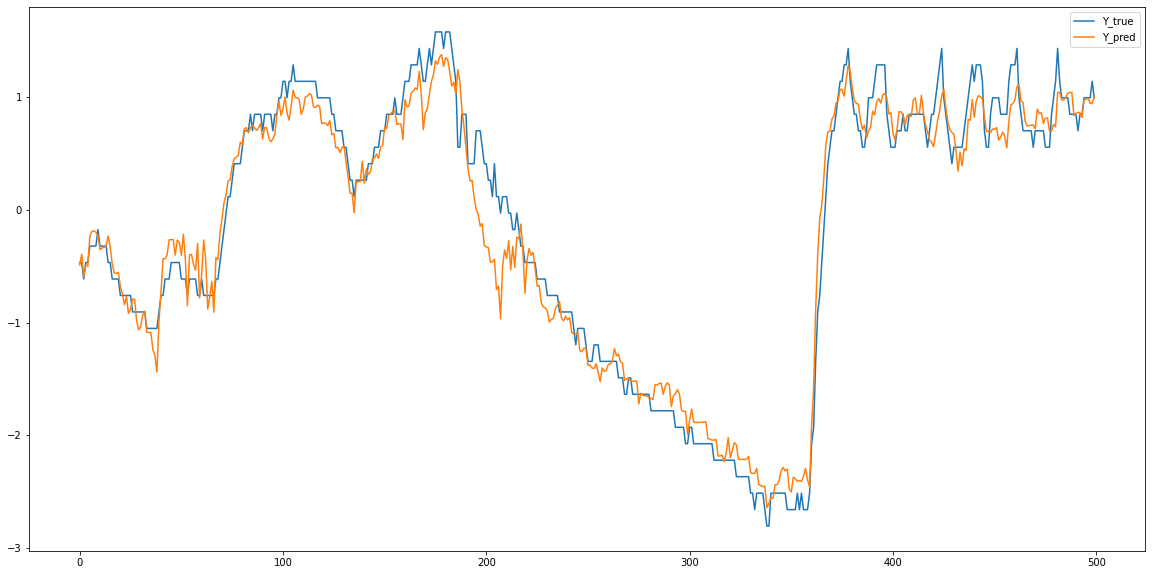

In [ ]:
y_pred=lin.predict(X)
plt.figure(figsize=(20, 10))
plt.plot(Y[:500], label='Y_true')
plt.plot(y_pred[:500], label='Y_pred')
plt.legend()

#ANN

In [ ]:
X_train.shape, y_test.shape

((61002, 7), (26144,))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(7,)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.3)

Epoch 1/20
1335/1335 [==============================] - 4s 2ms/step - loss: 0.0548 - val_loss: 0.0348
Epoch 2/20
1335/1335 [==============================] - 3s 2ms/step - loss: 0.0334 - val_loss: 0.0326
Epoch 3/20
1335/1335 [==============================] - 3s 2ms/step - loss: 0.0325 - val_loss: 0.0324
Epoch 4/20
1335/1335 [==============================] - 3s 2ms/step - loss: 0.0320 - val_loss: 0.0311
Epoch 5/20
1335/1335 [==============================] - 3s 2ms/step - loss: 0.0315 - val_loss: 0.0308
Epoch 6/20
1335/1335 [==============================] - 3s 2ms/step - loss: 0.0311 - val_loss: 0.0299
Epoch 7/20
1335/1335 [==============================] - 3s 2ms/step - loss: 0.0308 - val_loss: 0.0313
Epoch 8/20
1335/1335 [==============================] - 3s 2ms/step - loss: 0.0304 - val_loss: 0.0298
Epoch 9/20
1335/1335 [==============================] - 3s 2ms/step - loss: 0.0303 - val_loss: 0.0303
Epoch 10/20
1335/1335 [==============================] - 3s 2ms/step - loss: 0.030

In [ ]:
model.evaluate(X_test, y_test)

817/817 [==============================] - 1s 2ms/step - loss: 0.0294


0.029350729659199715

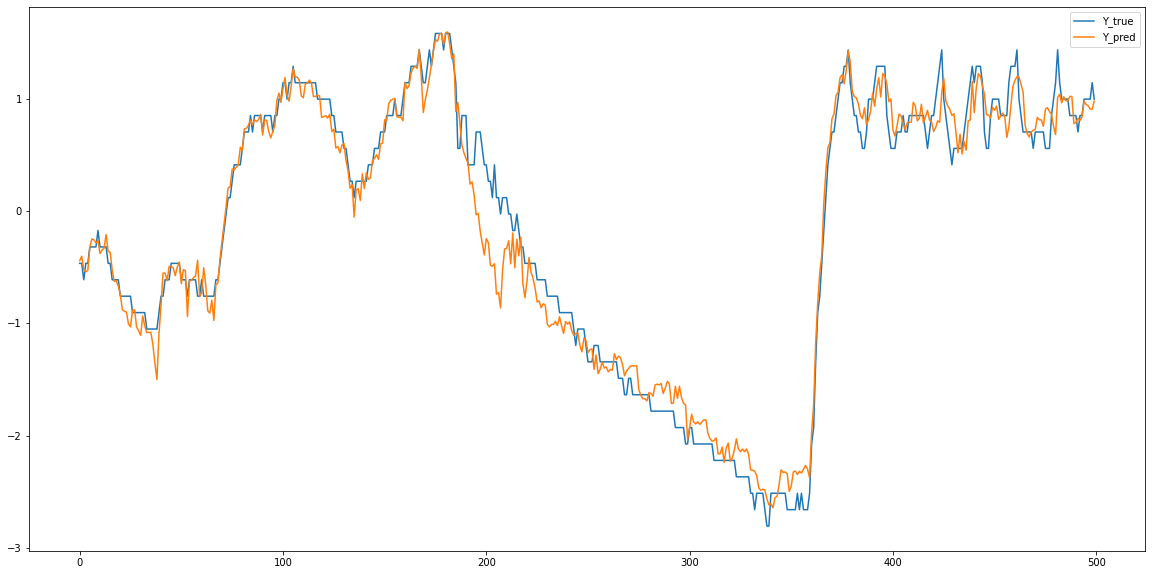

In [ ]:
y_pred=model.predict(X)
plt.figure(figsize=(20, 10))
plt.plot(Y[:500], label='Y_true')
plt.plot(y_pred[:500], label='Y_pred')
plt.legend()

In [ ]:
model=Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(7,)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mae')

In [ ]:
model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.3)

Epoch 1/20
1335/1335 [==============================] - 6s 4ms/step - loss: 0.1819 - val_loss: 0.1409
Epoch 2/20
1335/1335 [==============================] - 4s 3ms/step - loss: 0.1380 - val_loss: 0.1334
Epoch 3/20
1335/1335 [==============================] - 4s 3ms/step - loss: 0.1360 - val_loss: 0.1317
Epoch 4/20
1335/1335 [==============================] - 4s 3ms/step - loss: 0.1344 - val_loss: 0.1361
Epoch 5/20
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1332 - val_loss: 0.1318
Epoch 6/20
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1321 - val_loss: 0.1296
Epoch 7/20
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1313 - val_loss: 0.1285
Epoch 8/20
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1303 - val_loss: 0.1273
Epoch 9/20
1335/1335 [==============================] - 3s 2ms/step - loss: 0.1292 - val_loss: 0.1307
Epoch 10/20
1335/1335 [==============================] - 3s 2ms/step - loss: 0.129

In [ ]:
model.evaluate(X_test, y_test)

817/817 [==============================] - 1s 2ms/step - loss: 0.1251


0.1251067966222763

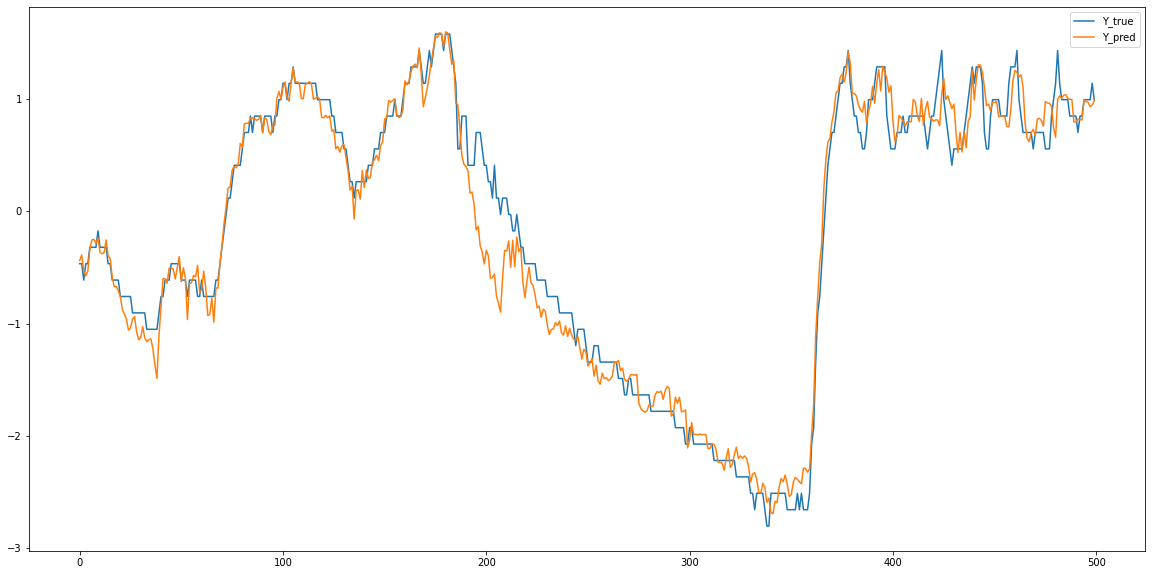

In [ ]:
y_pred=model.predict(X)
plt.figure(figsize=(20, 10))
plt.plot(Y[:500], label='Y_true')
plt.plot(y_pred[:500], label='Y_pred')
plt.legend()

#errors below

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nca.fit(X_train, y_train)

ValueError: ignored

In [ ]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
#X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=42)
nca = NeighborhoodComponentsAnalysis(n_components=4)
nca.fit(X_train, y_train)



ValueError: ignored

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# REDUCE FEATURES:- 

In [ ]:
import pandas as pd

In [ ]:
data =  pd.read_csv('/content/drive/MyDrive/T01_1009.csv')
dataw = pd.read_csv('/content/drive/MyDrive/T01(1).csv')

In [ ]:
data.shape

(1008, 80)

In [ ]:
data.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Gear_Bear_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Amb_Temp_Avg,Prod_LatestAvg_ActPwrGen0,Prod_LatestAvg_ActPwrGen1,Prod_LatestAvg_ActPwrGen2,Prod_LatestAvg_TotActPwr,Prod_LatestAvg_ReactPwrGen0,Prod_LatestAvg_ReactPwrGen1,Prod_LatestAvg_ReactPwrGen2,Prod_LatestAvg_TotReactPwr,HVTrafo_Phase1_Temp_Avg,HVTrafo_Phase2_Temp_Avg,HVTrafo_Phase3_Temp_Avg,Grd_InverterPhase1_Temp_Avg,Cont_Top_Temp_Avg,Cont_Hub_Temp_Avg,Cont_VCP_Temp_Avg,Gen_SlipRing_Temp_Avg,...,Blds_PitchAngle_Avg,Blds_PitchAngle_Std,Cont_VCP_ChokcoilTemp_Avg,Grd_RtrInvPhase1_Temp_Avg,Grd_RtrInvPhase2_Temp_Avg,Grd_RtrInvPhase3_Temp_Avg,Cont_VCP_WtrTemp_Avg,Grd_Prod_Pwr_Avg,Grd_Prod_CosPhi_Avg,Grd_Prod_Freq_Avg,Grd_Prod_VoltPhse1_Avg,Grd_Prod_VoltPhse2_Avg,Grd_Prod_VoltPhse3_Avg,Grd_Prod_CurPhse1_Avg,Grd_Prod_CurPhse2_Avg,Grd_Prod_CurPhse3_Avg,Grd_Prod_Pwr_Max,Grd_Prod_Pwr_Min,Grd_Busbar_Temp_Avg,Rtr_RPM_Std,Amb_WindSpeed_Est_Avg,Grd_Prod_Pwr_Std,Grd_Prod_ReactPwr_Avg,Grd_Prod_ReactPwr_Max,Grd_Prod_ReactPwr_Min,Grd_Prod_ReactPwr_Std,Grd_Prod_PsblePwr_Avg,Grd_Prod_PsblePwr_Max,Grd_Prod_PsblePwr_Min,Grd_Prod_PsblePwr_Std,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T01,2016-01-01T00:00:00+00:00,1277.4,1226.1,1249.0,9.0,41,58,59,58,30,44,48,28,11.3,10.9,11.1,11.6,0.5,3.3,0.9,-12.4,206.1,18,-107,4420,0,4313,-99,-5636,0,-5735,68,76,65,39,39,28,43,25,...,0.6,0.9,91,39,39,38,39,26.2,0.7,50.0,401.6,399.9,399.2,46.5,61.1,45.5,118.4,-33.5,38,0.1,3.6,35.3,-34.9,13.2,-100.0,36.2,29.4,119.3,0.0,31.9,-144.4,0.0,-584.5,157.1,144.4,584.5,0.0,157.1,37,218.5
1,T01,2016-01-01T00:10:00+00:00,1268.3,93.3,999.7,435.9,41,58,59,59,30,44,48,28,11.2,0.0,8.8,12.5,0.4,3.2,0.9,-1.1,217.4,18,-753,2488,0,1735,-867,-3871,0,-4738,68,76,65,38,39,28,42,25,...,8.1,14.7,91,37,36,37,37,10.1,0.7,50.0,401.9,400.7,399.5,34.3,41.9,33.6,101.5,-38.2,38,4.0,3.3,30.2,-28.0,1.8,-100.1,34.6,21.7,102.3,0.0,24.7,-79.6,0.0,-501.0,123.7,79.6,501.0,0.0,123.7,37,218.5
2,T01,2016-01-01T00:20:00+00:00,1394.4,220.3,774.0,486.1,41,57,57,57,30,43,46,29,12.3,1.9,6.8,8.8,0.7,4.3,1.0,-5.8,207.4,18,-784,10488,0,9704,-410,-1865,0,-2275,68,76,65,39,39,28,42,25,...,10.4,12.4,87,38,37,37,38,59.0,0.7,50.0,401.4,400.5,398.8,78.6,92.7,86.1,219.4,-34.1,38,4.3,4.1,77.5,-13.9,999.9,-108.1,154.8,88.9,224.9,0.0,54.3,-314.0,0.0,-1000.0,357.4,314.0,1000.0,0.0,357.4,37,213.3
3,T01,2016-01-01T00:30:00+00:00,1306.6,1212.4,1257.1,17.0,40,56,57,57,30,44,48,28,11.5,10.7,11.1,9.9,0.7,4.4,1.1,9.6,232.0,18,0,22673,0,22673,0,-15822,0,-15822,68,76,65,39,39,28,42,25,...,-0.5,0.8,87,38,38,38,38,135.7,0.8,50.0,399.7,398.1,396.9,128.1,160.8,136.8,250.3,-27.7,38,0.1,4.6,53.9,-94.9,0.0,-105.1,18.4,135.3,261.4,0.0,53.1,-654.0,0.0,-1000.0,245.8,654.0,1000.0,0.0,245.8,36,222.4
4,T01,2016-01-01T00:40:00+00:00,1320.9,1224.1,1257.7,18.0,40,57,58,57,30,44,48,28,11.7,10.8,11.1,9.9,0.8,4.1,1.2,23.3,245.6,18,-75,16581,0,16506,-79,-13314,0,-13394,68,76,65,39,39,28,42,25,...,-0.1,1.2,88,39,38,38,39,98.9,0.7,50.0,399.5,397.9,396.8,104.7,130.3,108.3,212.5,-50.2,38,0.2,4.3,65.9,-80.3,17.8,-107.1,35.8,102.7,221.8,0.0,60.2,-496.1,0.0,-1000.0,302.7,496.1,1000.0,0.0,302.7,36,222.4


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NeighborhoodComponentsAnalysis

In [ ]:
timestamp = data['Timestamp']
turbine_id = data['Turbine_ID']
Y = data['Gear_Oil_Temp_Avg']
data = data.drop(['Timestamp','Turbine_ID','Gear_Oil_Temp_Avg'], axis = 1)


In [ ]:
data.shape

(1008, 80)

Text(0, 0.5, 'dimension')

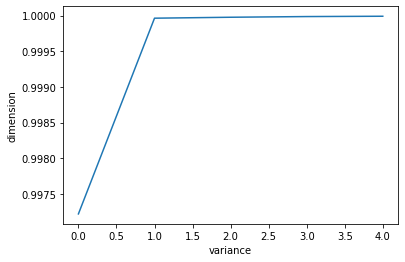

In [ ]:
pca = PCA(5)
pca.fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('variance') 
plt.ylabel('dimension') 

In [ ]:
nca = NeighborhoodComponentsAnalysis(random_state=42, n_components=54) 
nca.fit(data, Y) 

NeighborhoodComponentsAnalysis(callback=None, init='auto', max_iter=50,
                               n_components=54, random_state=42, tol=1e-05,
                               verbose=0, warm_start=False)

In [ ]:
transform_data = nca.transform(data)

In [ ]:
transform_data.shape

(1008, 54)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(transform_data, Y, test_size=0.3) 

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)
print("Train Score : - ", mean_squared_error(y_train, pred_train))
print("Test Score : - ", mean_squared_error(y_test, pred_test))

Train Score : -  0.0
Test Score : -  9.564356435643564
